In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from keras.layers import Input, Embedding, Flatten, Dot, Dense,Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split 
import warnings; warnings.simplefilter('ignore')

In [23]:
bd = pd.read_csv('/content/drive/My Drive/ML_Dataset/ratings.csv',encoding="ISO-8859-1")
train, test = train_test_split(bd, test_size=0.2, random_state=42)
n_users = len(bd.user_id.unique())
n_books = len(bd.book_id.unique())
bd.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [0]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')




Epoch 1/5





785404/785404 [==============================] - 114s 145us/step - loss: 14.1276
Epoch 2/5
785404/785404 [==============================] - 113s 144us/step - loss: 5.1229
Epoch 3/5
785404/785404 [==============================] - 112s 143us/step - loss: 1.9406
Epoch 4/5
785404/785404 [==============================] - 110s 140us/step - loss: 1.2546
Epoch 5/5
785404/785404 [==============================] - 111s 141us/step - loss: 0.9885


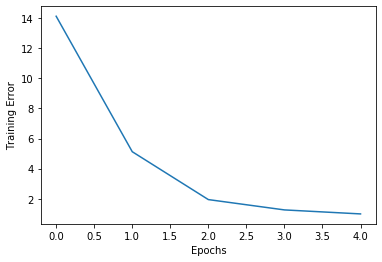

In [25]:
from keras.models import load_model

if os.path.exists('/content/drive/My Drive/ML_Dataset/regression_model.h5'):
    model = load_model('/content/drive/My Drive/ML_Dataset/regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [26]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 3s 14us/step


1.2286085564560576

In [27]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.2577586] 5
[3.4095926] 4
[2.6583586] 3
[4.3051233] 5
[3.6425016] 3
[3.9753113] 3
[3.5984275] 3
[4.8380136] 4
[4.0753875] 3
[3.766591] 5


[None, None, None, None, None, None, None, None, None, None]

In [0]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
785404/785404 [==============================] - 118s 150us/step - loss: 0.8021
Epoch 2/5
785404/785404 [==============================] - 116s 148us/step - loss: 0.6882
Epoch 3/5
785404/785404 [==============================] - 118s 150us/step - loss: 0.6575
Epoch 4/5
785404/785404 [==============================] - 118s 150us/step - loss: 0.6322
Epoch 5/5
785404/785404 [==============================] - 118s 150us/step - loss: 0.6089


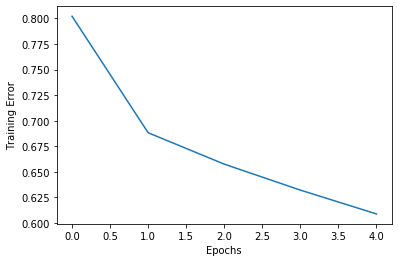

In [31]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [32]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 4s 18us/step


0.7093304300649186

In [33]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.0689793] 5
[3.7753816] 4
[3.4197893] 3
[4.2047544] 5
[3.3850198] 3
[4.027449] 3
[3.8454988] 3
[4.6708684] 4
[4.0627537] 3
[4.1506605] 5


[None, None, None, None, None, None, None, None, None, None]

In [0]:
"""Here book embedding is the way of representing the data points of weight vector of the neural networks 
where the weight vector is used because it gives a continuous way of representing the data point and dividing
it into different clusters based on user preferences."""
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [35]:
book_em_weights[:5]

array([[-0.02086251, -0.02013569,  0.04416226,  0.03734566, -0.02015433],
       [-1.3947588 , -0.37208977, -1.3235939 ,  1.2853497 ,  0.69291127],
       [-1.2844988 , -0.5124398 , -1.1334739 ,  1.1604626 ,  1.020958  ],
       [-1.0319202 ,  0.7565376 , -0.95522946,  0.9349482 ,  0.72823197],
       [-1.1136695 , -0.7556817 , -1.3441205 ,  1.3623013 ,  1.3429977 ]],
      dtype=float32)

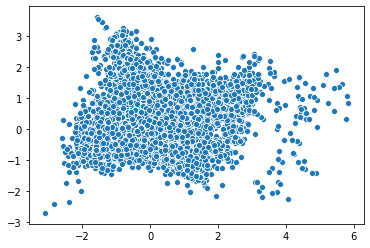

In [36]:
"""from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])"""

In [37]:
"""book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))"""

1.0

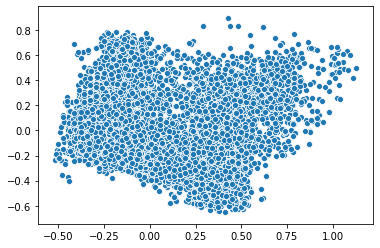

In [38]:
"""pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])"""

In [39]:
"""from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)"""

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.006s...
[t-SNE] Computed neighbors for 10001 samples in 0.568s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.043586
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.378075
[t-SNE] KL

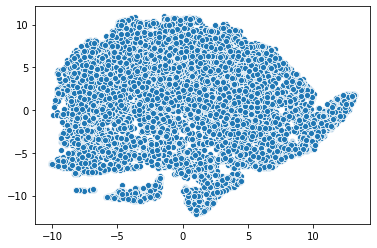

In [40]:
"""sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])"""

In [42]:
book_data = np.array(list(set(bd.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [43]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [44]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8998, 8588, 9841, 7660, 8258])

In [45]:
predictions[recommended_book_ids]

array([4.668128 , 4.6633716, 4.6508927, 4.5605145, 4.5309763],
      dtype=float32)

In [51]:
books = pd.read_csv('/content/drive/My Drive/ML_Dataset/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [52]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7659,7660,21330,21330,2910,15,1401204864,9.781401e+12,"Bill Willingham, Mark Buckingham, Steve Leialo...",2005.0,"Fables, Volume 5: The Mean Seasons","Fables, Vol. 5: The Mean Seasons",eng,4.19,17909,18221,545,120,340,2889,7435,7437,https://images.gr-assets.com/books/1327870458m...,https://images.gr-assets.com/books/1327870458s...
8257,8258,18594594,18594594,26341000,41,345547497,9.780346e+12,Karin Slaughter,2014.0,Cop Town,Cop Town,eng,3.88,10660,13997,1704,274,780,3299,5612,4032,https://images.gr-assets.com/books/1384822680m...,https://images.gr-assets.com/books/1384822680s...
8587,8588,432,432,2434710,25,140097317,9.780140e+12,Paul Auster,1985.0,City of Glass,"City of Glass (The New York Trilogy, #1)",eng,3.81,10157,11176,683,230,853,2758,4320,3015,https://images.gr-assets.com/books/1309986722m...,https://images.gr-assets.com/books/1309986722s...
8997,8998,292740,292740,2457130,37,2266071289,9.782266e+12,Lorenzo Carcaterra,1995.0,Sleepers,Sleepers,eng,4.18,9560,10772,553,73,304,1775,4088,4532,https://images.gr-assets.com/books/1327871596m...,https://images.gr-assets.com/books/1327871596s...
9840,9841,15101,15101,876908,55,380815923,9.780381e+12,Joanne Harris,1999.0,Blackberry Wine,Blackberry Wine,en-US,3.78,9558,11107,699,163,755,3215,4220,2754,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
